In [7]:
import numpy as np
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1) 
X = mnist["data"]
X = X[:2000]

In [90]:
# Everything below this assumes X is already defined
import matplotlib.pyplot as plt

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

def my_kmeans(matrix, K, N):
    num_points = len(matrix)
    matrix = np.asarray(matrix)
    final_clust=[]
    final_cents=[]
    losses=[]
    final_losses = []
    for i in range(N):
        #actual k-means algorithm below
        class_list = np.zeros(num_points) #defines which of the K centroids each row of the matrix is closest to
        
        
        initials = np.random.choice(2000, K, replace=False)
        centroids = np.asarray([matrix[index] for index in initials])
        
        
        
        # ^ will fill initial centroid list with k random points from the matrix
        #∨ iterative part of algorithm
        loss = []
        while True:
            for j in range(num_points):
                distances = dist(matrix[j], centroids)
                cluster = np.argmin(distances)
                class_list[j] = cluster    
            test = np.copy(centroids)
            loss_val=0
            for j in range(K):
                cluster_points = [X[m] for m in range(num_points) if class_list[m] == j]
                centroids[j] = np.mean(cluster_points, axis=0)
                loss_val+=np.sum((cluster_points-centroids[j])**2)
            loss.append(loss_val)
            if np.all(np.equal(test, centroids)):
                break
                
            
        print("Iteration",i+1)
        final_clust.append(cluster_points)
        final_cents.append(centroids)
        losses.append(loss)
        final_losses.append(loss[-1])
        plt.plot(loss)
        plt.show()
    print("Done")
    print()
    print("Return Values:")
    mindex = final_losses.index(min(final_losses))
    #return (best k final centroids, best final cluster assignments, all loss valuesof the best k-means iteration, final losses of all N iterations)
    return (final_cents[mindex], final_clust[mindex], losses[mindex], final_losses)
        

            


Iteration 1


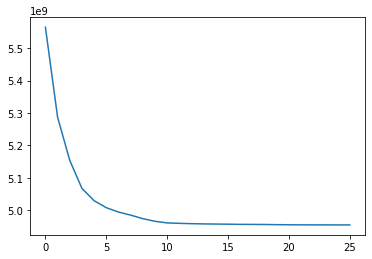

Iteration 2


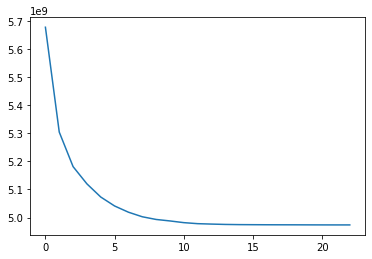

Iteration 3


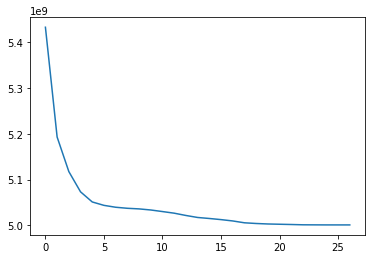

Iteration 4


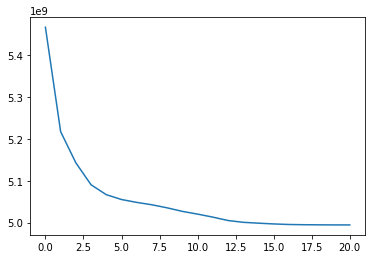

Iteration 5


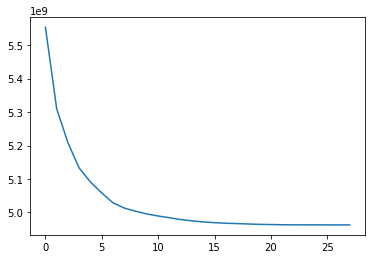

Iteration 6


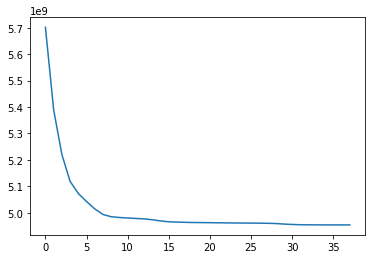

Iteration 7


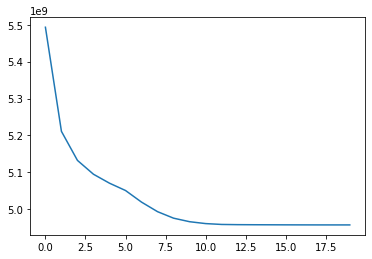

Iteration 8


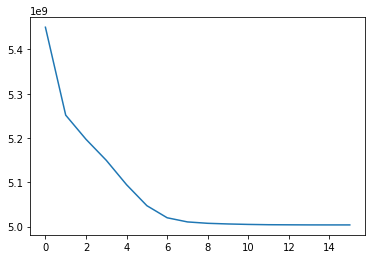

Iteration 9


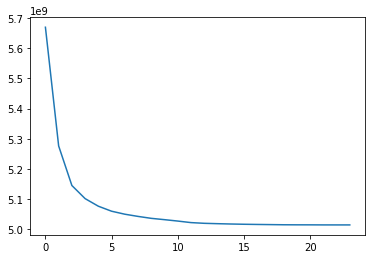

Iteration 10


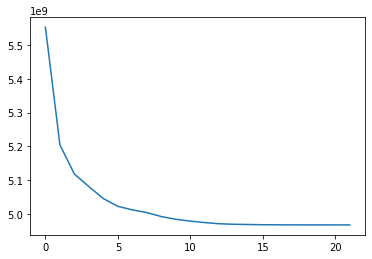

Iteration 11


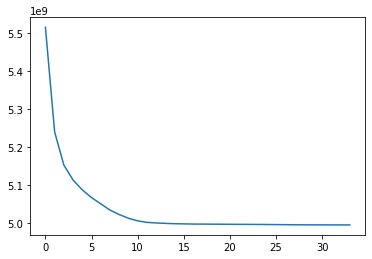

Iteration 12


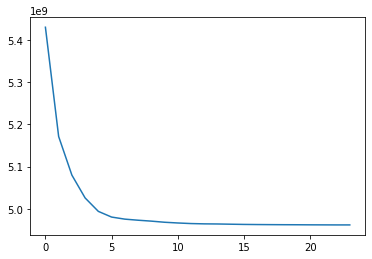

Iteration 13


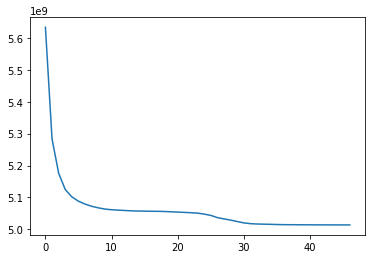

Iteration 14


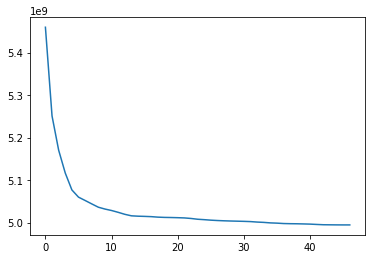

Iteration 15


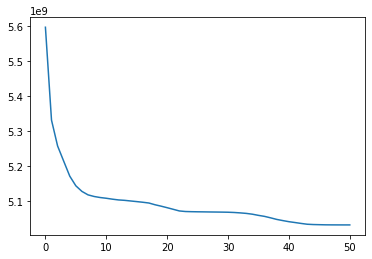

Done

Return Values:


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 [array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
 

In [91]:
my_kmeans(X, 10,15)